In [1]:
%matplotlib inline

In [1]:
basedir='/home/rms101/SCRIPTS/amoc_stab/'
import sys
sys.path.append(basedir + 'MODS')
import os
import cmipdata as cd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt # for basic plotting
import rms_plots as rpl
import rms_utils as rut
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.gridspec as gridspec
################settings
#rundir='/HOME/rms/SCRIPTS/6_OTHER/6PARIS-STAB/4SO/';os.chdir(rundir)
#mpl.style.reload_library()
plt.style.use('rms_paper')

registering cmaps
registering cmaps


In [2]:
#read data
rundir='/home/rms101/SCRIPTS/amoc_stab/FIG4_SO+RHO/';os.chdir(rundir)
srcdir_base='/space/hall3/sitestore/eccc/crd/ccrn/users/rms101/DATA/' 
datadir=srcdir_base+'/amoc_stab_post'

#1a: AMOC#############################################
#AMOC       
os.chdir(datadir+'/DATA_msftmyz_canesm2')
ens_his_amoc = cd.mkensemble('amoc_nh_am_*historical-r*',prefix='amoc_nh_am_')
ens_30c1_amoc = cd.mkensemble('amoc_nh_am_*lowwarming30*_r*i1p1_20??01-2???12.nc',prefix='amoc_nh_am_') #all up to 2100
ens_30c2_amoc = cd.mkensemble('amoc_nh_am_*lowwarming30*_r[1-5]i1p1_2[1-6]??01-2???12.nc',prefix='amoc_nh_am_') #1-5 past 2100

amoc_his=cd.loadfiles(ens_his_amoc,'msftmyz')['data']
amoc_30c1=cd.loadfiles(ens_30c1_amoc,'msftmyza')['data']
amoc_30c2=cd.loadfiles(ens_30c2_amoc,'msftmyza')['data']

amoc_his=amoc_his[:,0:111+1]

#1b: Atlantic ZM Salinity#############################################

os.chdir(datadir+'/DATA_so')

ens_pic=cd.mkensemble('atlzm_top8_am_*_piControl*',prefix='atlzm_top8_am_')
ens_his=cd.mkensemble('atlzm_top8_am_*_historical-r*',prefix='atlzm_top8_am_')
ens_15c=cd.mkensemble('atlzm_top8_am_*_lowwarming15*',prefix='atlzm_top8_am_')
ens_20c=cd.mkensemble('atlzm_top8_am_*_lowwarming20*',prefix='atlzm_top8_am_')
ens_30c=cd.mkensemble('atlzm_top8_am_*_lowwarming30*',prefix='atlzm_top8_am_')   

so_pic_atlzm=cd.loadfiles(ens_pic,'so')['data'].squeeze(); 
so_his_atlzm=cd.loadfiles(ens_his,'so')['data'].squeeze(); 
so_15c_atlzm=cd.loadfiles(ens_15c,'so')['data'].squeeze(); 
so_20c_atlzm=cd.loadfiles(ens_20c,'so')['data'].squeeze(); 
so_30c_atlzm=cd.loadfiles(ens_30c,'so')['data'].squeeze(); 

#dims
lat=cd.loadfiles(ens_pic,'so')['dimensions']['lat'];  nlat=lat.size

#1c: North Atlantic Salinity#############################################

ens_pic=cd.mkensemble('na_top8_am_*_piControl*',prefix='na_top8_am_')
ens_his=cd.mkensemble('na_top8_am_*_historical-r*',prefix='na_top8_am_')
ens_15c=cd.mkensemble('na_top8_am_*_lowwarming15*',prefix='na_top8_am_')
ens_20c=cd.mkensemble('na_top8_am_*_lowwarming20*',prefix='na_top8_am_')
ens_30c=cd.mkensemble('na_top8_am_*_lowwarming30*',prefix='na_top8_am_')   

so_pic_na=cd.loadfiles(ens_pic,'so')['data'].squeeze(); 
so_his_na=cd.loadfiles(ens_his,'so')['data'].squeeze(); 
so_15c_na=cd.loadfiles(ens_15c,'so')['data'].squeeze(); 
so_20c_na=cd.loadfiles(ens_20c,'so')['data'].squeeze(); 
so_30c_na=cd.loadfiles(ens_30c,'so')['data'].squeeze(); 

so_piclim_na=np.mean(so_pic_na) #constanst
so_his_na_r=so_his_na-so_piclim_na
so_15c_na_r=so_15c_na-so_piclim_na
so_20c_na_r=so_20c_na-so_piclim_na
so_30c_na_r=so_30c_na-so_piclim_na

so_his_na_r=so_his_na_r[:,0:111+1]

#1d: North to South Atlantic Density gradient#############################################

os.chdir(datadir+'/DATA_rho0')

ens_pic_top8_na_rho=cd.mkensemble('na_top8_am_*_piControl*',prefix='na_top8_am_')
ens_his_top8_na_rho=cd.mkensemble('na_top8_am_*_historical-r*',prefix='na_top8_am_')
ens_15c_top8_na_rho=cd.mkensemble('na_top8_am_*_lowwarming15*',prefix='na_top8_am_')
ens_20c_top8_na_rho=cd.mkensemble('na_top8_am_*_lowwarming20*',prefix='na_top8_am_')
ens_30c_top8_na_rho=cd.mkensemble('na_top8_am_*_lowwarming30*',prefix='na_top8_am_')   

ens_pic_top8_sa_rho=cd.mkensemble('sa_top8_am_*_piControl*',prefix='sa_top8_am_')
ens_his_top8_sa_rho=cd.mkensemble('sa_top8_am_*_historical-r*',prefix='sa_top8_am_')
ens_15c_top8_sa_rho=cd.mkensemble('sa_top8_am_*_lowwarming15*',prefix='sa_top8_am_')
ens_20c_top8_sa_rho=cd.mkensemble('sa_top8_am_*_lowwarming20*',prefix='sa_top8_am_')
ens_30c_top8_sa_rho=cd.mkensemble('sa_top8_am_*_lowwarming30*',prefix='sa_top8_am_')  

rho_pic_na=cd.loadfiles(ens_pic_top8_na_rho,'rho0')['data'].squeeze(); 
rho_his_na=cd.loadfiles(ens_his_top8_na_rho,'rho0')['data'].squeeze(); 
rho_15c_na=cd.loadfiles(ens_15c_top8_na_rho,'rho0')['data'].squeeze(); 
rho_20c_na=cd.loadfiles(ens_20c_top8_na_rho,'rho0')['data'].squeeze(); 
rho_30c_na=cd.loadfiles(ens_30c_top8_na_rho,'rho0')['data'].squeeze(); 

rho_pic_sa=cd.loadfiles(ens_pic_top8_sa_rho,'rho0')['data'].squeeze(); 
rho_his_sa=cd.loadfiles(ens_his_top8_sa_rho,'rho0')['data'].squeeze(); 
rho_15c_sa=cd.loadfiles(ens_15c_top8_sa_rho,'rho0')['data'].squeeze(); 
rho_20c_sa=cd.loadfiles(ens_20c_top8_sa_rho,'rho0')['data'].squeeze(); 
rho_30c_sa=cd.loadfiles(ens_30c_top8_sa_rho,'rho0')['data'].squeeze(); 

rho_his_na=rho_his_na[:,0:111+1]
rho_his_sa=rho_his_sa[:,0:111+1]

#1e: North to South Atlantic Density gradient (thermal)#############################################
os.chdir(datadir+'/DATA_rho0t')

ens_his_top8_na_rhot=cd.mkensemble('na_top8_am_*_historical-r*',prefix='na_top8_am_')
ens_30c_top8_na_rhot=cd.mkensemble('na_top8_am_*_lowwarming30*',prefix='na_top8_am_')   

ens_his_top8_sa_rhot=cd.mkensemble('sa_top8_am_*_historical-r*',prefix='sa_top8_am_')
ens_30c_top8_sa_rhot=cd.mkensemble('sa_top8_am_*_lowwarming30*',prefix='sa_top8_am_')  

rhot_his_na=cd.loadfiles(ens_his_top8_na_rhot,'rho0t')['data'].squeeze(); 
rhot_30c_na=cd.loadfiles(ens_30c_top8_na_rhot,'rho0t')['data'].squeeze(); 

rhot_his_sa=cd.loadfiles(ens_his_top8_sa_rhot,'rho0t')['data'].squeeze(); 
rhot_30c_sa=cd.loadfiles(ens_30c_top8_sa_rhot,'rho0t')['data'].squeeze(); 

rhot_his_na=rhot_his_na[:,0:111+1]
rhot_his_sa=rhot_his_sa[:,0:111+1]

#1f: North to South Atlantic Density gradient (thermal)#############################################
os.chdir(datadir+'/DATA_rho0s')

ens_his_top8_na_rhos=cd.mkensemble('na_top8_am_*_historical-r*',prefix='na_top8_am_')
ens_30c_top8_na_rhos=cd.mkensemble('na_top8_am_*_lowwarming30*',prefix='na_top8_am_')   

ens_his_top8_sa_rhos=cd.mkensemble('sa_top8_am_*_historical-r*',prefix='sa_top8_am_')
ens_30c_top8_sa_rhos=cd.mkensemble('sa_top8_am_*_lowwarming30*',prefix='sa_top8_am_')  

rhos_his_na=cd.loadfiles(ens_his_top8_na_rhos,'rho0s')['data'].squeeze(); 
rhos_30c_na=cd.loadfiles(ens_30c_top8_na_rhos,'rho0s')['data'].squeeze(); 

rhos_his_sa=cd.loadfiles(ens_his_top8_sa_rhos,'rho0s')['data'].squeeze(); 
rhos_30c_sa=cd.loadfiles(ens_30c_top8_sa_rhos,'rho0s')['data'].squeeze(); 

rhos_his_na=rhos_his_na[:,0:111+1]
rhos_his_sa=rhos_his_sa[:,0:111+1]



os.chdir(rundir)

This ensemble contains:
1 variables
1 models
5 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
50 realizations
50 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
1 realizations
1 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use 

In [4]:
years_his=np.arange(1950,2061+1);nyear_his=len(years_his)
years_15c=np.arange(2021,2600+1);nyear_15c=len(years_15c)
years_20c=np.arange(2036,2600+1);nyear_20c=len(years_20c)
years_30c=np.arange(2061,2600+1);nyear_30c=len(years_30c)
years2=np.arange(2101,2600+1)

years_30c1=np.arange(2061,2100+1)

so_piclim_atlzm=np.mean(so_pic_atlzm,axis=0) #lat,piclim
so_his_atlzm=so_his_atlzm[:,0:111+1,:]

so_his_atlzm_r=np.mean(so_his_atlzm,axis=0)-np.tile(so_piclim_atlzm,(nyear_his,1)) 
so_15c_atlzm_r=np.mean(so_15c_atlzm,axis=0)-np.tile(so_piclim_atlzm,(nyear_15c,1)) 
so_20c_atlzm_r=np.mean(so_20c_atlzm,axis=0)-np.tile(so_piclim_atlzm,(nyear_20c,1)) 
so_30c_atlzm_r=np.mean(so_30c_atlzm,axis=0)-np.tile(so_piclim_atlzm,(nyear_30c,1)) 


/home/rms101/.conda/envs/py2_rms_v2/lib/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'latlon'
  s)


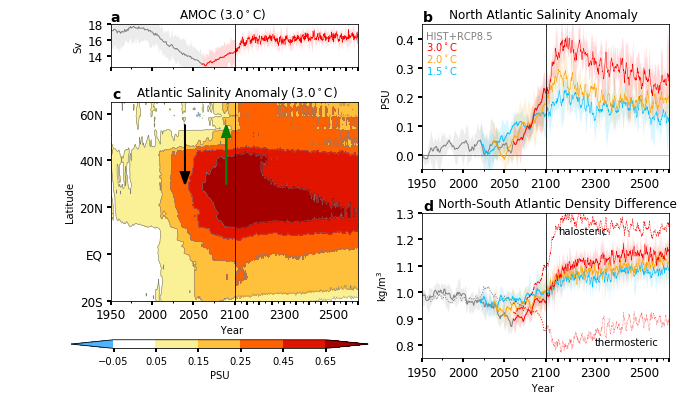

In [5]:
#Open figure##################################################
fig = plt.figure(constrained_layout=False,figsize=(8,8))
gs1 = gridspec.GridSpec(nrows=4, ncols=2, left=0.02, right=0.45,
                        wspace=0,hspace=0.8,bottom=0.4)
ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[0, 1])
ax3 = fig.add_subplot(gs1[1::, 0])
ax4 = fig.add_subplot(gs1[1::, 1])

gs2 = gridspec.GridSpec(nrows=2, ncols=2, left=0.56, right=0.99,
                        wspace=0,hspace=0.3,bottom=0.3)
ax5 = fig.add_subplot(gs2[0, 0])
ax6 = fig.add_subplot(gs2[0, 1])
ax7 = fig.add_subplot(gs2[1, 0])
ax8 = fig.add_subplot(gs2[1, 1])



def set_xaxis1 (ax):
  ax.set_xlim([1950, 2100]) 
  ax.xaxis.set_major_locator(MultipleLocator(50))
  ax.xaxis.set_minor_locator(MultipleLocator(25)) 

def set_xaxis2 (ax):
  ax.set_xlim([2100, 2600]) 
  ax.xaxis.set_major_locator(MultipleLocator(50))
  ax.xaxis.set_minor_locator(MultipleLocator(25)) 
  ax.set_xticklabels(('','','','','','2300','','','','2500'))

####### plot
def plot_x(ax,years,x,color,linewidth):
  kwargs={'linewidth': linewidth, 'color': color}
  ax.plot(years,np.mean(x,axis=0),**kwargs)                                    
  # range
  kwargs={'color':color, 'alpha': 0.15, 'linewidth': 0}
  ax.fill_between(years,np.min(x,axis=0), np.max(x,axis=0),**kwargs)
  #ax.fill_between(years,np.mean(x,axis=0)-np.std(x,axis=0), np.mean(x,axis=0)+np.std(x,axis=0),**kwargs)

def plot_x2(ax,years,x,color,linewidth,linestyle='-'):
  kwargs={'linewidth': linewidth, 'color': color,'linestyle': linestyle}
  ax.plot(years,np.mean(x,axis=0),**kwargs)    

#PANEL A: AMOC########################################    
#1950-2100############################################
ax=ax1; 
set_xaxis1(ax);
ax.set_xticklabels((''))
ax.set_ylim([12.5, 18])
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.set_ylabel('Sv')
rpl.add_title(ax1,'                          AMOC (3.0$^\circ$C)','')
ax.text(1950,18.4,'a',fontweight='bold',fontsize=14)    
####### plot
plot_x(ax,years_his,amoc_his,'gray',1)
plot_x(ax,years_30c1,amoc_30c1,'red',1)

#2100-2600############################################
ax=ax2; 
set_xaxis2(ax);
ax.set_xticklabels((''))
ax.set_ylim([12.5, 18])
ax.set_yticklabels((''));ax.yaxis.set_tick_params(length=0,width=0)
plot_x(ax,np.arange(2101,2600+1),amoc_30c2,'red',0.5)


#PANEL B: 2D SALINITY###########################################   
#Plot settings##################################################
#clevs=np.array([-0.65,-0.45,-0.25,-0.15,-0.05,0.05,0.15,0.25,0.45,0.65])
clevs=np.array([-0.05,0.05,0.15,0.25,0.45,0.65])
cmapi=np.array([4,9,10,12,14,16,18])
cfparams=dict(clevs=clevs,plot_co=False,latlon=False,cmapi=cmapi)
coparams1=dict(colors='gray',levels=clevs,linewidths=0.6)
coparams2=dict(colors='gray',levels=clevs,linewidths=0.3)

##########Column 1: 1950-2100
ax=ax3; 
set_xaxis1(ax); 
ax.set_xlabel('                                      Year')
ax.set_ylim([-20,65])  
ax.set_yticks(np.arange(-20,80,20))
ax.set_yticklabels(('20S','EQ', '20N', '40N', '60N','80N'))
ax.set_ylabel('Latitude')

#plot
cf=rpl.add_cf(ax,years_his,lat,np.transpose(so_his_atlzm_r),**cfparams)
xs,ys=np.meshgrid(years_his,lat)
ax.contour(xs,ys,np.transpose(so_his_atlzm_r),**coparams1)
cf=rpl.add_cf(ax,years_30c,lat,np.transpose(so_30c_atlzm_r),**cfparams)
xs,ys=np.meshgrid(years_30c,lat)
ax.contour(xs,ys,np.transpose(so_30c_atlzm_r),**coparams1)


#line
#ax.axvline(x=2061,linewidth=1)
#title
rpl.add_title(ax3,'                                  Atlantic Salinity Anomaly (3.0$^\circ$C)','c')
#arrows
arrowargs=dict(linewidth=2,head_width=10,head_length=5,zorder=10)

ax.arrow(2090, 30,0,20,facecolor='green',edgecolor='green',**arrowargs)
ax.arrow(2040, 55,0,-20,facecolor='black',edgecolor='black',**arrowargs)

##########Column 2: 2100-2600

####3.0
ax=ax4; 
set_xaxis2(ax)
ax.set_ylim([-20,65])
ax.set_yticklabels((''));ax.yaxis.set_tick_params(length=0,width=0)
#plot
cf=rpl.add_cf(ax,years_30c,lat,np.transpose(so_30c_atlzm_r),**cfparams)
xs,ys=np.meshgrid(years_30c,lat)
coparams={'colors':'darkgray','levels':clevs,'linewidths':1}
ax.contour(xs,ys,np.transpose(so_30c_atlzm_r),**coparams2)

##########cbar
rpl.add_cb(ax,cf,lscale=2.4,x0scale=-0.4,y0scale=-3,orientation='horizontal',units='PSU',spacing='uniform')

#PANEL C: SALINITY TS###########################################   

ax=ax5; 
#1950-2100############################################
set_xaxis1(ax)
ax.set_ylim([-0.05, 0.45])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.set_ylabel('PSU')
ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)
plot_x(ax,years_his,so_his_na_r,'gray',1)
plot_x(ax,years_15c,so_15c_na_r,'deepskyblue',1)
plot_x(ax,years_20c,so_20c_na_r,'orange',1)
plot_x(ax,years_30c,so_30c_na_r,'red',1)
rpl.add_title(ax,'                               North Atlantic Salinity Anomaly','b')

##legend##
ax.text(1955,0.4,'HIST+RCP8.5',color= 'gray')
ax.text(1955,0.36,'3.0$^\circ$C',color= 'red')
ax.text(1955,0.32,'2.0$^\circ$C',color= 'orange')
ax.text(1955,0.28,'1.5$^\circ$C',color= 'deepskyblue')


#2100-2600############################################
ax=ax6
set_xaxis2(ax)
ax.set_ylim([-0.05, 0.45])
ax.set_yticklabels((''));ax.yaxis.set_tick_params(length=0,width=0)
ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=0.5)
plot_x(ax,years_his,so_his_na_r,'gray',0.5)
plot_x(ax,years_15c,so_15c_na_r,'deepskyblue',0.5)
plot_x(ax,years_20c,so_20c_na_r,'orange',0.5)
plot_x(ax,years_30c,so_30c_na_r,'red',0.5)

#PANEL D: N-S density gradient TS#####################   

#1950-2100############################################
ax=ax7

set_xaxis1(ax)
ax.set_xlabel('                                      Year')
ax.set_ylim([0.75, 1.3])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.set_ylabel('kg/m$^3$')
ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)
rpl.add_title(ax7,'                                      North-South Atlantic Density Difference','d')

plot_x(ax,years_his,rho_his_na-rho_his_sa,'gray',1)
plot_x2(ax,years_his,rhot_his_na-rhot_his_sa,'gray',1,'dotted')

plot_x(ax,years_15c,rho_15c_na-rho_15c_sa,'deepskyblue',1)
plot_x(ax,years_20c,rho_20c_na-rho_20c_sa,'orange',1)
plot_x(ax,years_30c,rho_30c_na-rho_30c_sa,'red',1)
plot_x2(ax,years_30c,rhot_30c_na-rhot_30c_sa,'red',1,'dotted')
plot_x2(ax,years_30c,(rhos_30c_na-rhos_30c_sa),'red',1,'dashed')

#2101-2600############################################
ax=ax8
set_xaxis2(ax)

ax.set_ylim([0.75, 1.3])

ax.set_yticklabels(('')); ax.yaxis.set_tick_params(length=0,width=0)
ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)

plot_x(ax,years_his,rho_his_na-rho_his_sa,'gray',0.5)
plot_x(ax,years_15c,rho_15c_na-rho_15c_sa,'deepskyblue',0.5)
plot_x(ax,years_20c,rho_20c_na-rho_20c_sa,'orange',0.5)
plot_x(ax,years_30c,rho_30c_na-rho_30c_sa,'red',0.5)
plot_x2(ax,years_30c,rhot_30c_na-rhot_30c_sa,'red',0.5,'dotted')
plot_x2(ax,years_30c,rhos_30c_na-rhos_30c_sa,'red',0.5,'dashed')

#legend##
ax.text(2150,1.22,'halosteric')
ax.text(2300,0.8,'thermosteric')

rpl.mysavefig(fig,'PLOTS/fig4.png')
rpl.mysavefig(fig,'PLOTS/fig4.pdf')

In [ ]:
rho_grad_his=np.mean(rho_his_na[0:50]-rho_his_sa[0:50])
rho_grad_15c=np.mean(rho_15c_na[-50::]-rho_15c_sa[-50::])
rho_grad_20c=np.mean(rho_20c_na[-50::]-rho_20c_sa[-50::])
rho_grad_30c=np.mean(rho_30c_na[-50::]-rho_30c_sa[-50::])


text_file = open("rho_grad_stabilization2_equi.txt", "w")


text_file.write('rhograd his:'+ "%5.3f"%(rho_grad_his) + '\n\n')
text_file.write('rhograd 15c:'+ "%5.3f"%(rho_grad_15c) + '\n')
text_file.write('rhograd 15c-his:'+ "%5.3f"%((rho_grad_15c-rho_grad_his)*100/rho_grad_his) + '%\n\n')

text_file.write('rhograd 20c:'+ "%5.3f"%(rho_grad_20c) + '\n')
text_file.write('rhograd 20c-his:'+ "%5.3f"%((rho_grad_20c-rho_grad_his)*100/rho_grad_his) + '%\n\n')

text_file.write('rhograd 30c:'+ "%5.3f"%(rho_grad_30c) + '\n')
text_file.write('rhograd 30c-his:'+ "%5.3f"%((rho_grad_30c-rho_grad_his)*100/rho_grad_his) + '%\n\n')

text_file.write('rhograd 20c-15c:'+ "%5.3f"%((rho_grad_20c-rho_grad_15c)*100/rho_grad_15c) + '%\n')
text_file.write('rhograd 30c-15c:'+ "%5.3f"%((rho_grad_30c-rho_grad_15c)*100/rho_grad_15c) + '%\n')


text_file.close()





